<a href="https://colab.research.google.com/github/SantiagoGarciaC/default_prediction_project/blob/main/02%20-%20model_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

## Importación de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, KFold, ShuffleSplit, cross_val_score, learning_curve, cross_validate

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/SantiagoGarciaC/default_prediction_project/main/processed_data.csv', index_col='customer_ID')

In [3]:
data.head(10)

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_43,D_44,...,D_76_3,D_42_1,D_42_2,D_42_3,D_42_4,D_82_1,D_82_2,D_82_3,D_82_4,D_82_5
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0.875312,0.003838,0.024047,0.996822,0.002516,0.179691,0.001590,0.004999,0.083017,0.215063,...,1,0,0,1,0,1,0,0,0,0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,0.849264,0.080220,0.034198,0.982920,0.003504,0.182143,0.001580,0.004361,0.098416,0.214928,...,0,0,1,0,0,0,0,0,0,1
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,0.832897,0.001402,0.018378,0.808781,0.003717,0.116386,0.002222,0.004223,0.097365,0.218487,...,1,1,0,0,0,1,0,0,0,0
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc,0.618804,0.018090,0.059654,0.947360,0.003174,0.224490,0.001753,0.004972,0.084463,0.215275,...,0,1,0,0,0,0,0,0,0,1
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed,0.843028,0.001574,0.019535,0.807655,0.002329,0.199633,0.001705,0.003897,0.082417,0.214646,...,1,1,0,0,0,0,0,1,0,0
000084e5023181993c2e1b665ac88dbb1ce9ef621ec5370150fc2f8bdca6202c,0.768303,0.074289,0.035286,0.966840,0.003207,0.243259,0.001457,0.005165,0.076223,0.243934,...,0,1,0,0,0,0,0,0,1,0
000098081fde4fd64bc4d503a5d6f86a0aedc425c96f5235f98b0f47c9d7d8d4,0.500558,0.003722,0.067801,0.245061,0.002203,0.260986,0.001726,0.102243,0.087703,0.215460,...,0,0,0,1,0,1,0,0,0,0
0000d17a1447b25a01e42e1ac56b091bb7cbb06317be4cb59b50fec59e0b6381,0.930460,0.131852,0.061945,0.231213,0.003180,0.176794,0.000823,0.106465,0.076923,0.214874,...,1,1,0,0,0,0,0,1,0,0
0000f99513770170a1aba690daeeb8a96da4a39f11fc27da5c30a79db61c1e85,0.471524,0.046429,0.713258,0.024215,0.003508,0.195116,0.001902,0.941832,0.082029,0.386239,...,0,0,0,0,1,0,0,1,0,0


# Function for plot learning curves

In [4]:
def plot_learning_curve(estimator,X,y,cv): 
  from sklearn.model_selection import learning_curve
  train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, shuffle=True)
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)
  # Plot learning curve
  plt.grid()
  plt.fill_between(
          train_sizes,
          train_scores_mean - train_scores_std,
          train_scores_mean + train_scores_std,
          alpha=0.1,
          color="r",
      )
  plt.fill_between(
          train_sizes,
          test_scores_mean - test_scores_std,
          test_scores_mean + test_scores_std,
          alpha=0.1,
          color="g",
      )
  plt.plot(train_sizes, train_scores_mean, "o-", color="r", label="train score")
  plt.plot(train_sizes, test_scores_mean, "o-", color="g", label="validation score")
  plt.legend(loc="best")
  plt.ylabel("Score")
  plt.xlabel("Training examples")
  plt.title(estimator.__class__.__name__)
  return plt.show()

## Train, Validation and Test Split Dataset

In [5]:
X = data.drop(['target'], axis=1)
y = data['target']

test_size = 0.3
val_size  = test_size/(1-test_size)
print ("test size %.2f" %(test_size))
print ("val size is %.2f (relative to %.2f) "%(val_size, 1-test_size))

Xtv, Xts, ytv, yts = train_test_split(X, y, test_size=test_size, random_state=42)

test size 0.30
val size is 0.43 (relative to 0.70) 


# Random Forest Classifier

## Cross Validation for Random Forest

In [6]:
estimator_1 = RandomForestClassifier(n_estimators=5, max_depth=10)

In [7]:
cross_val = cross_validate(estimator_1, Xtv, ytv, return_train_score=True, return_estimator=True,
               cv=ShuffleSplit(n_splits=10, test_size=val_size))

In [8]:
def report_cv_score(est):
    print ("validation score   %.3f (±%.4f) with %d splits"%(np.mean(est["test_score"]), np.std(est["test_score"]), len(est["test_score"])))
    print ("train score        %.3f (±%.4f) with %d splits"%(np.mean(est["train_score"]), np.std(est["train_score"]), len(est["train_score"])))

In [9]:
report_cv_score(cross_val)

validation score   0.849 (±0.0060) with 10 splits
train score        0.963 (±0.0028) with 10 splits


## Learning curves for Random Forest

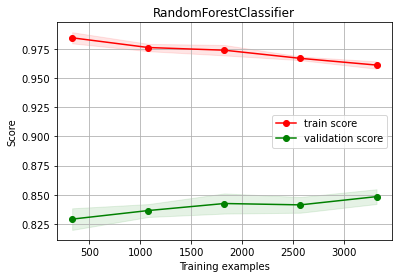

In [10]:
cv = ShuffleSplit(n_splits=10, test_size=val_size)
plot_learning_curve(estimator_1,Xtv,ytv,cv=cv)

## Modificación de los hiperparámetros

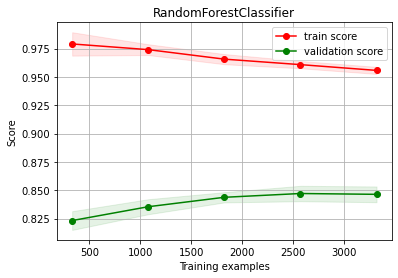

In [11]:
estimator = RandomForestClassifier(n_estimators=5, max_depth=9)
cv = ShuffleSplit(n_splits=10, test_size=val_size)
plot_learning_curve(estimator,Xtv,ytv,cv=cv)

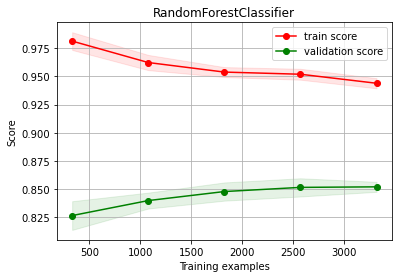

In [12]:
estimator = RandomForestClassifier(n_estimators=5, max_depth=8)
cv = ShuffleSplit(n_splits=10, test_size=val_size)
plot_learning_curve(estimator,Xtv,ytv,cv=cv)

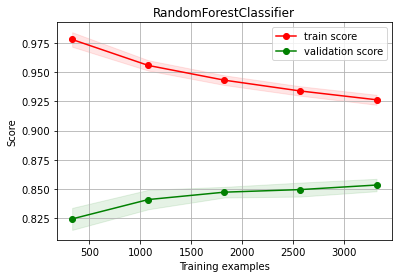

In [13]:
estimator = RandomForestClassifier(n_estimators=5, max_depth=7)
cv = ShuffleSplit(n_splits=10, test_size=val_size)
plot_learning_curve(estimator,Xtv,ytv,cv=cv)

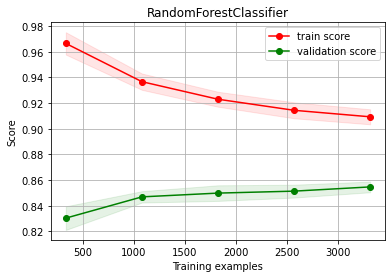

In [14]:
estimator = RandomForestClassifier(n_estimators=5, max_depth=6)
cv = ShuffleSplit(n_splits=10, test_size=val_size)
plot_learning_curve(estimator,Xtv,ytv,cv=cv)

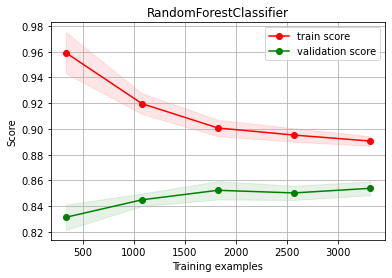

In [15]:
estimator = RandomForestClassifier(n_estimators=5, max_depth=5)
cv = ShuffleSplit(n_splits=10, test_size=val_size)
plot_learning_curve(estimator,Xtv,ytv,cv=cv)

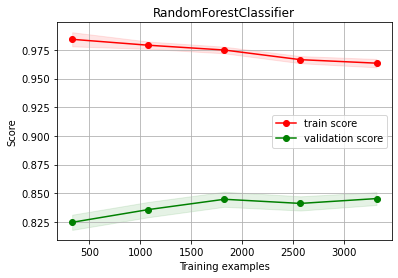

In [16]:
estimator = RandomForestClassifier(n_estimators=5, max_depth=10)
cv = ShuffleSplit(n_splits=10, test_size=val_size)
plot_learning_curve(estimator,Xtv,ytv,cv=cv)

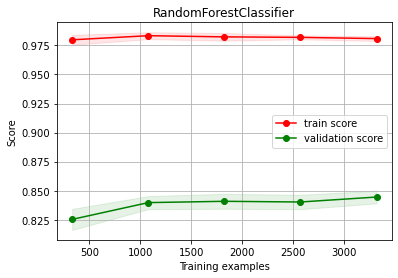

In [17]:
estimator = RandomForestClassifier(n_estimators=5, max_depth=15)
cv = ShuffleSplit(n_splits=10, test_size=val_size)
plot_learning_curve(estimator,Xtv,ytv,cv=cv)

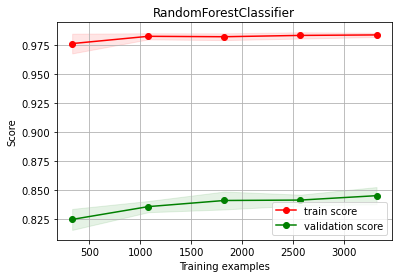

In [18]:
estimator = RandomForestClassifier(n_estimators=5, max_depth=20)
cv = ShuffleSplit(n_splits=10, test_size=val_size)
plot_learning_curve(estimator,Xtv,ytv,cv=cv)

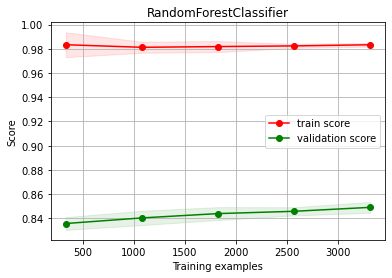

In [19]:
estimator = RandomForestClassifier(n_estimators=5, max_depth=25)
cv = ShuffleSplit(n_splits=10, test_size=val_size)
plot_learning_curve(estimator,Xtv,ytv,cv=cv)

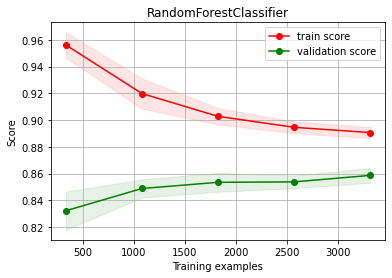

In [20]:
estimator = RandomForestClassifier(n_estimators=5, max_depth=5)
cv = ShuffleSplit(n_splits=10, test_size=val_size)
plot_learning_curve(estimator,Xtv,ytv,cv=cv)

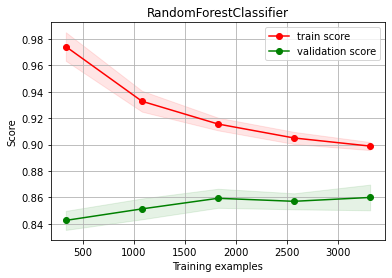

In [21]:
estimator = RandomForestClassifier(n_estimators=10, max_depth=5)
cv = ShuffleSplit(n_splits=10, test_size=val_size)
plot_learning_curve(estimator,Xtv,ytv,cv=cv)

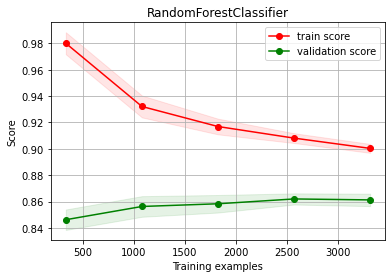

In [22]:
estimator = RandomForestClassifier(n_estimators=15, max_depth=5)
cv = ShuffleSplit(n_splits=10, test_size=val_size)
plot_learning_curve(estimator,Xtv,ytv,cv=cv)

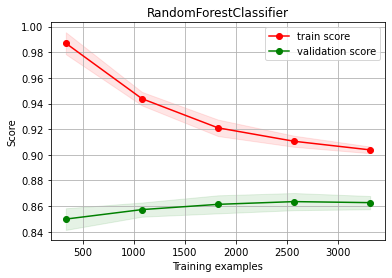

In [23]:
estimator = RandomForestClassifier(n_estimators=20, max_depth=5)
cv = ShuffleSplit(n_splits=10, test_size=val_size)
plot_learning_curve(estimator,Xtv,ytv,cv=cv)

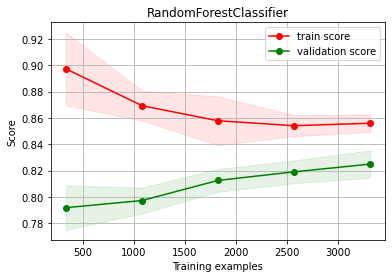

In [24]:
estimator = RandomForestClassifier(n_estimators=1, max_depth=5)
cv = ShuffleSplit(n_splits=10, test_size=val_size)
plot_learning_curve(estimator,Xtv,ytv,cv=cv)

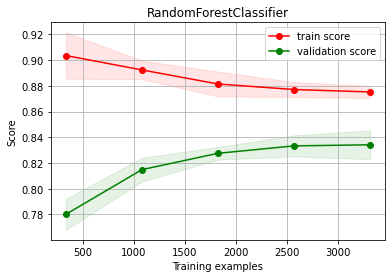

In [25]:
estimator = RandomForestClassifier(n_estimators=2, max_depth=5)
cv = ShuffleSplit(n_splits=10, test_size=val_size)
plot_learning_curve(estimator,Xtv,ytv,cv=cv)

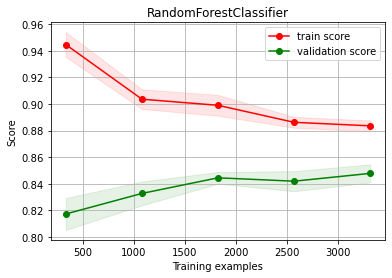

In [26]:
estimator = RandomForestClassifier(n_estimators=3, max_depth=5)
cv = ShuffleSplit(n_splits=10, test_size=val_size)
plot_learning_curve(estimator,Xtv,ytv,cv=cv)

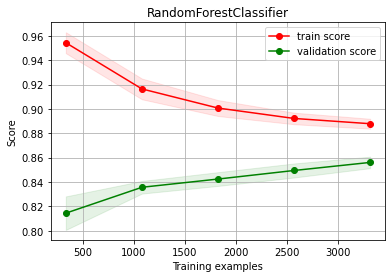

In [27]:
estimator = RandomForestClassifier(n_estimators=4, max_depth=5)
cv = ShuffleSplit(n_splits=10, test_size=val_size)
plot_learning_curve(estimator,Xtv,ytv,cv=cv)

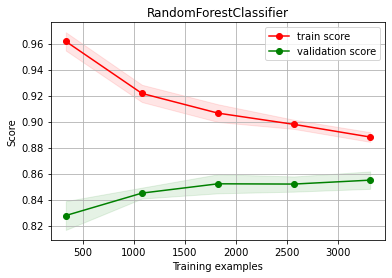

In [28]:
estimator = RandomForestClassifier(n_estimators=5, max_depth=5)
cv = ShuffleSplit(n_splits=10, test_size=val_size)
plot_learning_curve(estimator,Xtv,ytv,cv=cv)

## Modelo escogido a partir de las curvas de aprendizaje de Random Forest

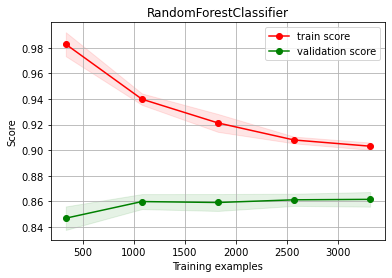

In [48]:
final_estimator = RandomForestClassifier(n_estimators=20, max_depth=5)
cv = ShuffleSplit(n_splits=10, test_size=val_size)
plot_learning_curve(final_estimator,Xtv,ytv,cv=cv)

# Random Forest with PCA

In [49]:
Xtr_v, Xts_v, ytr_v, yts_v = train_test_split(Xtv,ytv,test_size=val_size)

In [50]:
dt = final_estimator
cs = range(10,200,5)
dtr, dts = [], []
for n_components in cs:
    print (".", end="")
    pca = PCA(n_components=n_components)
    pca.fit(Xtr_v)

    Xt_tr = pca.transform(Xtr_v)
    Xt_ts = pca.transform(Xts_v)

    dt.fit(Xt_tr,ytr_v)
    ypreds_tr = dt.predict(Xt_tr)
    ypreds_ts = dt.predict(Xt_ts)
    ypreds_tr.shape, ypreds_ts.shape
    dtr.append(np.mean(ytr_v==ypreds_tr))
    dts.append(np.mean(yts_v==ypreds_ts))


......................................

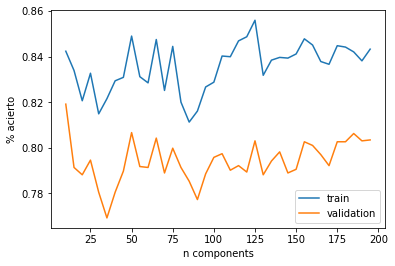

In [51]:
plt.plot(cs, dtr, label="train")
plt.plot(cs, dts, label="validation")
plt.xlabel("n components")
plt.ylabel("% acierto")
plt.legend()

In [52]:
best_cs = cs[np.argmax(dts)]
best_cs

10

In [53]:
estimator_2 = Pipeline((("pca", PCA(n_components=best_cs)), ("estimator", final_estimator)))

In [54]:
cross_val = cross_validate(estimator_2, Xtv, ytv, return_train_score=True, return_estimator=True,
               cv=ShuffleSplit(n_splits=10, test_size=val_size))

In [55]:
report_cv_score(cross_val)

validation score   0.808 (±0.0080) with 10 splits
train score        0.842 (±0.0030) with 10 splits


## Learning curve for RF with PCA

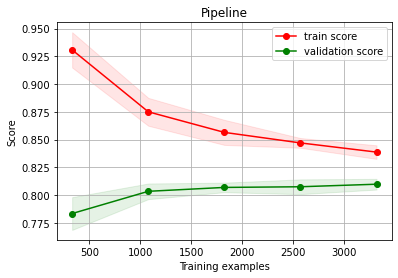

In [56]:
estimator_2 = Pipeline((("pca", PCA(n_components=best_cs)), ("estimator", final_estimator)))
cv = ShuffleSplit(n_splits=10, test_size=val_size)
plot_learning_curve(estimator_2,Xtv,ytv,cv=cv)

# Model selection

In [66]:
zscores = []
estimators = [final_estimator, estimator_2]
for estimator in estimators:
    print("--")
    z = cross_validate(estimator, Xtv, ytv, return_train_score=True, return_estimator=False,
                        cv=ShuffleSplit(n_splits=10, test_size=val_size))
    report_cv_score(z)
    zscores.append(np.mean(z["test_score"]))
best = np.argmax(zscores)
print ("selecting ", best)
best_estimator = estimators[best]
print ("\nselected model")
print (best_estimator)

--
validation score   0.867 (±0.0047) with 10 splits
train score        0.900 (±0.0044) with 10 splits
--
validation score   0.809 (±0.0102) with 10 splits
train score        0.839 (±0.0065) with 10 splits
selecting  0

selected model
RandomForestClassifier(max_depth=5, n_estimators=20)


# Model performance

In [67]:
best_estimator.fit(Xtv,ytv)
reported_performance = best_estimator.score(Xts, yts)
print ("reported performance of selected model %.3f"%reported_performance)

reported performance of selected model 0.857


# American Express Metric

In [68]:
def amex_metric(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:

    def top_four_percent_captured(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        df = (pd.concat([y_true, y_pred], axis='columns')
              .sort_values('prediction', ascending=False))
        df['weight'] = df['target'].apply(lambda x: 20 if x==0 else 1)
        four_pct_cutoff = int(0.04 * df['weight'].sum())
        df['weight_cumsum'] = df['weight'].cumsum()
        df_cutoff = df.loc[df['weight_cumsum'] <= four_pct_cutoff]
        return (df_cutoff['target'] == 1).sum() / (df['target'] == 1).sum()
        
    def weighted_gini(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        df = (pd.concat([y_true, y_pred], axis='columns')
              .sort_values('prediction', ascending=False))
        df['weight'] = df['target'].apply(lambda x: 20 if x==0 else 1)
        df['random'] = (df['weight'] / df['weight'].sum()).cumsum()
        total_pos = (df['target'] * df['weight']).sum()
        df['cum_pos_found'] = (df['target'] * df['weight']).cumsum()
        df['lorentz'] = df['cum_pos_found'] / total_pos
        df['gini'] = (df['lorentz'] - df['random']) * df['weight']
        return df['gini'].sum()
    def normalized_weighted_gini(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        y_true_pred = y_true.rename(columns={'target': 'prediction'})
        return weighted_gini(y_true, y_pred) / weighted_gini(y_true, y_true_pred)

    g = normalized_weighted_gini(y_true, y_pred)
    d = top_four_percent_captured(y_true, y_pred)

    return 0.5 * (g + d)

In [69]:
predicts = best_estimator.predict_proba(X)

In [70]:
prob = np.array([predicts[item][1] for item in range(len(predicts))])

In [71]:
data['prediction'] = prob

In [72]:
df_pred = pd.DataFrame(data['prediction'])

In [73]:
df_y = pd.DataFrame(y)

In [74]:
print('La métrica evaluada por American Express es %.3f ' %amex_metric(df_y,df_pred))

La métrica evaluada por American Express es 0.725 
